# Advanced Indexing & Broadcasting

In [4]:
import numpy as np

x = np.arange(6);x

array([0, 1, 2, 3, 4, 5])

In [12]:
# tuples
x[(0,1,3),]

array([0, 1, 3])

In [14]:
x[(0,1,3)]

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

In [15]:
x[0,1,3]

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

In [16]:
x[[0,1]]

array([0, 1])

# Exercise 1

In [18]:
# Subset to get the 2x2 with 5,6,9,10
x = np.arange(16).reshape((4,4));x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [23]:
x[[1,2],1:3] #my answer

array([[ 5,  6],
       [ 9, 10]])

In [24]:
x[1:3,1:3] #answer

array([[ 5,  6],
       [ 9, 10]])

In [25]:
x[[1,2],[1,2]] #false

array([ 5, 10])

In [26]:
x[[3,3,3,0],] # duplicate possible

array([[12, 13, 14, 15],
       [12, 13, 14, 15],
       [12, 13, 14, 15],
       [ 0,  1,  2,  3]])

# Boolean indexing

In [30]:
# true => keep, false => discard
x=np.arange(6);x

array([0, 1, 2, 3, 4, 5])

In [31]:
x[(True, False, True, False, True, False)]

array([], shape=(0, 6), dtype=int64)

In [33]:
x>3 #vectorized comparison operations

array([False, False, False, False,  True,  True])

In [34]:
# numpy and boolean operators
x = np.arange(6);x

array([0, 1, 2, 3, 4, 5])

In [35]:
y = x % 2 == 0 ; y

array([ True, False,  True, False,  True, False])

In [36]:
~y #inverse

array([False,  True, False,  True, False,  True])

In [37]:
y & (x > 3)

array([False, False, False, False,  True, False])

In [38]:
y | (x > 3)

array([ True, False,  True, False,  True,  True])

In [40]:
# useful function = meshgrid
# all combinations
pts = np.arange(3)
x, y = np.meshgrid(pts, pts)
print(x)
print(y)

[[0 1 2]
 [0 1 2]
 [0 1 2]]
[[0 0 0]
 [1 1 1]
 [2 2 2]]


In [ ]:
y

# Exercise 2

In [42]:
pts = np.linspace(-1,3,5000); pts

array([-1.        , -0.99919984, -0.99839968, ...,  2.99839968,
        2.99919984,  3.        ])

In [44]:
x, y = np.meshgrid(pts, pts)

In [45]:
f = (1-x)**2 + 100*(y-x**2)**2 ; f

array([[  404.        ,   403.35718397,   402.71539241, ...,
         9984.80409733,  9994.39846444, 10004.        ],
       [  403.68000001,   403.03743999,   402.39590422, ...,
         9983.2053775 ,  9992.7989766 , 10002.39974396],
       [  403.36012808,   402.71782405,   402.07654408, ...,
         9981.60678572,  9991.19961682, 10000.79961597],
       ...,
       [  403.36012808,   403.9965439 ,   404.63296018, ...,
         3594.40115259,  3600.15782415,  3605.92064018],
       [  403.68000001,   404.31667183,   404.95334391, ...,
         3593.44230468,  3599.19820824,  3604.96025606],
       [  404.        ,   404.63692782,   405.27385569, ...,
         3592.48358482,  3598.23872038,  3604.        ]])

In [48]:
mn = np.min(f)
print(x[f == mn], y[f == mn]) # use boolean

[0.99959992] [0.99959992]


In [51]:
min_i = np.argmin(f, axis=None)
print(min_i)
print(x.ravel()[min_i], y.ravel()[min_i]) #ravel does not change data but just change view as flatten

12497499
0.9995999199839969 0.9995999199839969


# Broadcasting 

In [52]:
# change format with arithmetic operation generalization
# twice faster and memoery efficiency
x = np.array([1,2,3])
x * 2;
x * np.array([2]);
x * np.array([2,2,2])

array([2, 4, 6])

# Example - Standardizing

In [56]:
# standardize the three columns to have mean 0 and std dev1
rng = np.random.default_rng(123)
d = rng.normal(loc=[-1,0,1],scale=[1,2,3],size=(1000,3))
d

array([[-1.98912135, -0.7355733 ,  4.86377578],
       [-0.80602558,  1.8404618 ,  2.73131137],
       [-1.63646365,  1.08390444,  0.05021365],
       ...,
       [-1.14459772,  0.51459755, -3.58042238],
       [-1.67891212,  1.4087411 ,  2.07708115],
       [-0.90922757,  0.83887759, -2.34997427]])

In [57]:
d_stand = (d - d.mean(axis=0))/d.std(axis=0)
d_stand.shape

(1000, 3)

# Numpy - Basic file IO

In [ ]:
# reading and writing arrays
x = np.arange(1e5)
np.save("data/x.npy",x)
new_x = np.load("data/x.npy") #binary format
np.all(x == new_x)

# Scipy 

## Example 1 - K-means clustering

In [4]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Create random data
rng = np.random.default_rng(seed = 123)

# Clustered data
cl1 = rng.multivariate_normal([-2,-2], [[1,-0.5],[-0.5,1]], size=100)
cl2 = rng.multivariate_normal([1,0], [[1,0],[0,1]], size=150)
cl3 = rng.multivariate_normal([3,2], [[1,-0.7],[-0.7,1]], size=200)

# Combine clustered data into one data set
pts = np.concatenate((cl1,cl2,cl3))

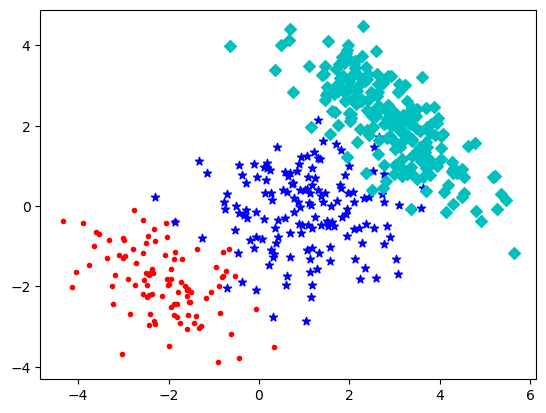

In [10]:
plt.cla() # Create empty plot
plt.scatter(cl1[:,0], cl1[:,1], c="r", marker = ".")
plt.scatter(cl2[:,0], cl2[:,1], c="b", marker = "*")
plt.scatter(cl3[:,0], cl3[:,1], c="c", marker = "D")
plt.show() # Show three data sets' scatters

In [7]:
from scipy.cluster.vq import kmeans

ctr, dist = kmeans(pts, 3)
ctr

array([[ 2.8434388 ,  2.03852015],
       [ 0.9972847 , -0.17610249],
       [-2.01390637, -1.8207127 ]])

In [8]:
dist

1.2155239295112092

In [9]:
cl1.mean(axis=0)
cl2.mean(axis=0)
cl3.mean(axis=0)

array([2.86992451, 2.09721887])

In [17]:
ks = range(1,6)
dists = [kmeans(pts,k)[1] for k in ks]
np.array(dists).reshape((-1,1))

array([[2.5975078 ],
       [1.59341892],
       [1.21552393],
       [1.01502763],
       [0.93958236]])

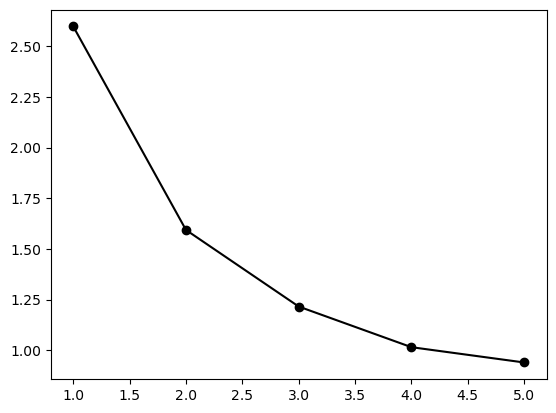

In [18]:
plt.cla()
p = plt.plot(ks, dists, "-ok")
plt.show()

## Example 2 - Numerical Integration

In [19]:
from scipy.integrate import quad # integral
quad(lambda x: x, 0, 1)

(0.5, 5.551115123125783e-15)

In [20]:
quad(np.sin, 0, np.pi)

(2.0, 2.220446049250313e-14)

In [21]:
quad(np.sin, 0, np.pi)
quad(np.sin, 0, 2*np.pi)

(2.221501482512777e-16, 4.3998892617845996e-14)

In [22]:
quad(np.exp, 0, 1)

(1.7182818284590453, 1.9076760487502457e-14)

In [23]:
# Normal PDF
def norm_pdf(x, mu, sigma):
    return(1/(sigma*np.sqrt(2*np.pi)))*np.exp(-0.5 * ((x-mu)/sigma)**2)

In [24]:
norm_pdf(0,0,1)

0.3989422804014327

In [25]:
norm_pdf(-np.Inf, 0, 1) # work well with numpy inf value

0.0

In [28]:
# Good reference in Korean https://zephyrus1111.tistory.com/275
def f(x):
    return x**2
result = quad(f,0,1) #lower0, upper1 x belongs to (0,1)
print("overall result:",result)
print("integral:", result[0])
print("error:", result[1])

overall result: (0.33333333333333337, 3.700743415417189e-15)
integral: 0.33333333333333337
error: 3.700743415417189e-15


In [31]:
# Truncated normals
def trunc_norm_pdf(x, μ=0, σ=1, a=-np.inf, b=np.inf):
  if (b < a):
      raise ValueError("b must be greater than a")
  x = np.asarray(x).reshape(-1)
  full_pdf = (1/(σ * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x - μ)/σ)**2)
  full_pdf[(x < a) | (x > b)] = 0
  return full_pdf

In [33]:
def trunc_norm_pdf(x, μ=0, σ=1, a=-np.inf, b=np.inf):
  if (b < a):
      raise ValueError("b must be greater than a")
  x = np.asarray(x).reshape(-1)
  nc = 1 / quad(lambda x: norm_pdf(x, μ, σ), a, b)[0] #modified
  full_pdf = nc * (1/(σ * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x - μ)/σ)**2)
  full_pdf[(x < a) | (x > b)] = 0
  return full_pdf

In [34]:
trunc_norm_pdf(0, a=-1, b=1)
trunc_norm_pdf(2, a=-1, b=1)
trunc_norm_pdf(-2, a=-1, b=1)
trunc_norm_pdf([-2,1,0,1,2], a=-1, b=1)

array([0.        , 0.35443745, 0.58436857, 0.35443745, 0.        ])

In [37]:
# Multivariate normal
def mv_norm(x,mu,sig):
    x=np.asarray(x)
    mu=np.asarray(mu)
    sig=np.asarray(sig)
    return np.linalg.det(2*np.pi*sig)**(-0.5)*np.exp(-0.5*(x-mu).T@np.linalg.solve(sig, (x-mu)))

In [38]:
norm_pdf(0,0,1)

0.3989422804014327

In [39]:
mv_norm([0], [0], [[1]])
mv_norm([0,0], [0,0], [[1,0],[0,1]])
mv_norm([0,0,0], [0,0,0], [[1,0,0],[0,1,0],[0,0,1]])

0.06349363593424098

## Example 3 - Basic Optimization

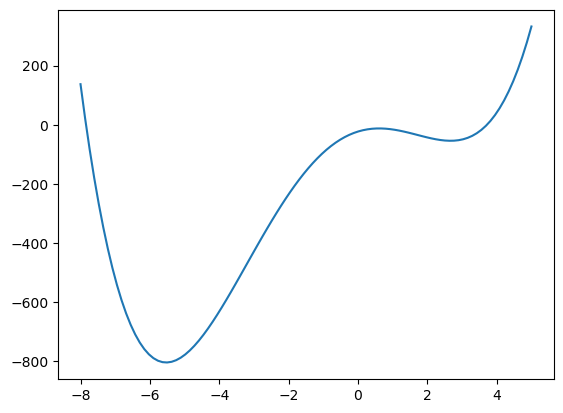

In [41]:
# minimization
def f(x):
    return x**4 + 3*(x-2)**3 - 15*(x)**2 + 1
x = np.linspace(-8, 5, 100)
plt.plot(x, f(x))

In [42]:
from scipy.optimize import minimize_scalar
minimize_scalar(f, method="Brent") #local minimum
minimize_scalar(f, method="bounded", bounds=[0,6]) #bounded minimum

     fun: -803.3955308825871
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: -5.528801009134004

In [43]:
from scipy.optimize import show_options
show_options(solver="minimize_scalar")



brent
=====

Options
-------
maxiter : int
    Maximum number of iterations to perform.
xtol : float
    Relative error in solution `xopt` acceptable for convergence.

Notes
-----
Uses inverse parabolic interpolation when possible to speed up
convergence of golden section method.

bounded

Options
-------
maxiter : int
    Maximum number of iterations to perform.
disp: int, optional
    If non-zero, print messages.
        0 : no message printing.
        1 : non-convergence notification messages only.
        2 : print a message on convergence too.
        3 : print iteration results.
xatol : float
    Absolute error in solution `xopt` acceptable for convergence.

golden

Options
-------
maxiter : int
    Maximum number of iterations to perform.
xtol : float
    Relative error in solution `xopt` acceptable for convergence.


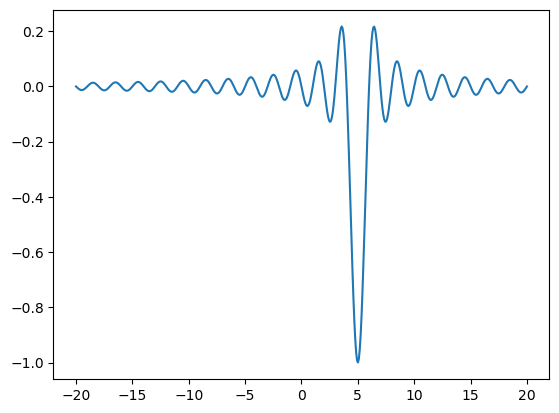

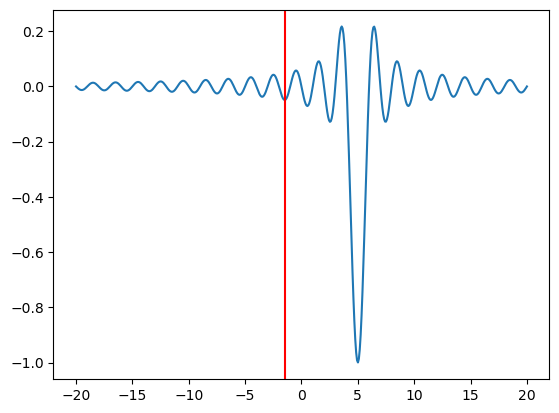

In [46]:
# local minima
def f(x):
  return -np.sinc(x-5)
x = np.linspace(-20, 20, 500)
plt.cla()
p = plt.plot(x, f(x));
plt.show()
res = minimize_scalar(f)
res
x = np.linspace(-20, 20, 500)
plt.cla()
p = plt.plot(x, f(x));
plt.axvline(res.x, c='red')
plt.show()

     fun: -1.0
    nfev: 12
     nit: 8
 success: True
       x: 5.000000000618556


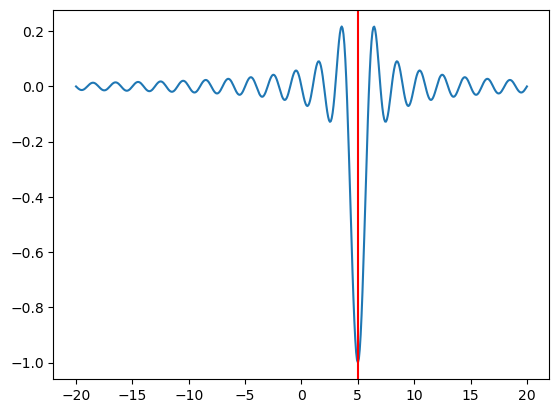

In [49]:
rng = np.random.default_rng(seed=1234)

lower = rng.uniform(-20, 20, 100)
upper = lower + 1

# opt class objects in sols
sols = [minimize_scalar(f, bracket=(l,u)) for l,u in zip(lower, upper)]
funs = [sol.fun for sol in sols]

# value to make minimum sols
best = sols[np.argmin(funs)]
print(best)

plt.cla()
p = plt.plot(x, f(x));
plt.axvline(best.x, c='red')
plt.show()

In [51]:
# Rosenbrock's funciton minima
def f(x):
  return (1-x[0])**2 + 100*(x[1]-x[0]**2)**2

from scipy.optimize import minimize
print(minimize(f, [0,0]))
minimize(f, [-1,-1]).x

      fun: 2.8440316101421118e-11
 hess_inv: array([[0.49482454, 0.98957634],
       [0.98957634, 1.98394215]])
      jac: array([ 3.98673709e-06, -2.84416559e-06])
  message: 'Optimization terminated successfully.'
     nfev: 72
      nit: 19
     njev: 24
   status: 0
  success: True
        x: array([0.99999467, 0.99998932])


array([0.99999553, 0.99999106])

## Example 4 - Spatial Tools

In [52]:
# Nearest Neighbors
rng = np.random.default_rng(seed=12345)
pts = rng.multivariate_normal(
  [0,0], [[1,.8],[.8,1]], 
  size=10
) #generate 10 points in space
pts

array([[ 0.951133  ,  1.75038506],
       [ 0.90794002,  0.74402448],
       [ 0.30576524, -0.16281136],
       [ 1.09240417,  1.50280001],
       [ 0.27501972, -0.96007933],
       [-2.53321395, -1.92068272],
       [ 0.43511779,  1.00571808],
       [ 0.46218239,  0.42379897],
       [-0.3509701 , -1.14575681],
       [-0.98870241, -0.1039104 ]])

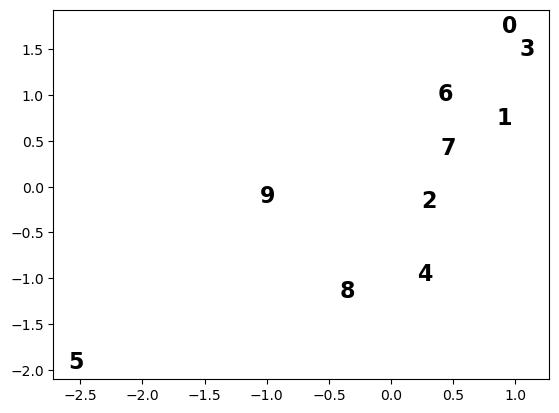

In [56]:
plt.cla()
plt.scatter(pts[:,0], pts[:,1], c='w')

for i in range(10):
    plt.annotate(str(i), (pts[i,0], pts[i,1]), weight="bold", size=16, ha='center', va='center')

plt.show()

In [57]:
# KD Trees
from scipy.spatial import KDTree

kd = KDTree(pts)
kd
dir(kd)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_cython__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__setstate_cython__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_weights',
 'boxsize',
 'count_neighbors',
 'data',
 'indices',
 'innernode',
 'leafnode',
 'leafsize',
 'm',
 'maxes',
 'mins',
 'n',
 'node',
 'query',
 'query_ball_point',
 'query_ball_tree',
 'query_pairs',
 'size',
 'sparse_distance_matrix',
 'tree']

In [58]:
#what is three nearest neighbors?
dist, i = kd.query(pts[6,:], k=3)
dist
i

array([6, 1, 7])

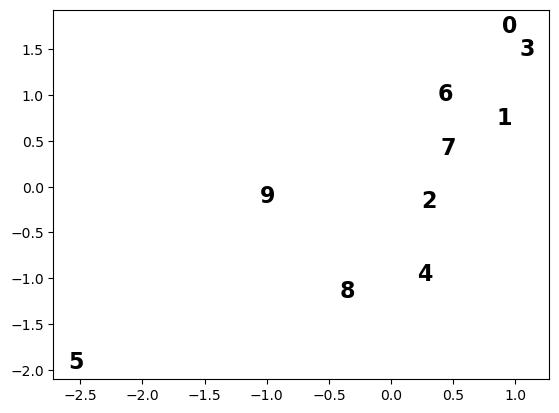

In [59]:
plt.cla()
plt.scatter(pts[:,0], pts[:,1], c='w')

for i in range(10):
    plt.annotate(str(i), (pts[i,0], pts[i,1]), weight="bold", size=16, ha='center', va='center')

plt.show()

In [60]:
from scipy.spatial import ConvexHull

# 
hull = ConvexHull(pts)
hull
dir(hull)

hull.simplices

array([[0, 3],
       [4, 5],
       [9, 5],
       [9, 0],
       [1, 3],
       [1, 4]], dtype=int32)

## Example 5 - stats

In [61]:
from scipy.stats import norm, gamma, binom, uniform

norm().rvs(size=5)
uniform.pdf([0,0.5,1,2])


binom.mean(n=10, p=0.25)
binom.median(n=10, p=0.25)

gamma(a=1,scale=1).stats()
norm().stats(moments="mvsk")

(array(0.), array(1.), array(0.), array(0.))

In [62]:
norm().rvs(size=5)

array([ 1.01905466,  0.07300133, -0.66376124,  0.6724747 ,  0.79680041])

In [63]:
norm().stats(moments="mvsk") #mean, variance, fisher's skew, fisher's kurtosis

(array(0.), array(1.), array(0.), array(0.))

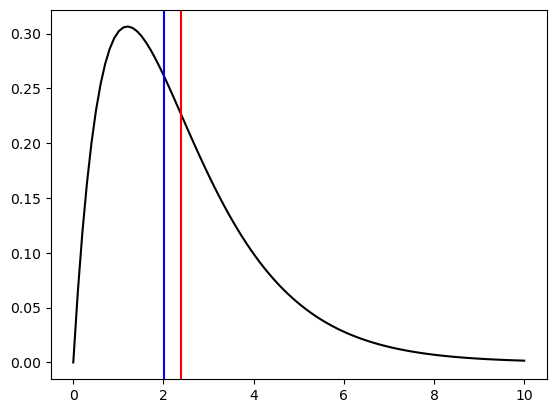

In [64]:
g = gamma(a=2, loc=0, scale=1.2) #freezing

x = np.linspace(0, 10, 100)
plt.plot(x, g.pdf(x), "k-")
plt.axvline(x=g.mean(), c="r")
plt.axvline(x=g.median(), c="b")

In [65]:
x = norm.rvs(loc=2.5, scale=2, size=1000, random_state=1234)
norm.fit(x)
norm.fit(x, loc=2.5) # provide a guess for the parameter

(2.5314811643075235, 1.946132398754459)

In [66]:
x = gamma.rvs(a=2.5, size=1000)
gamma.fit(x) # shape, loc, scale

y = gamma.rvs(a=2.5, loc=-1, scale=2, size=1000)
gamma.fit(y) # shape, loc, scale

(2.410329471161071, -0.9816978958643232, 2.120321321085349)